In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
# Load the transformed data
file_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data/transformed/transformed_data.csv"))
df = pd.read_csv(file_path)

In [12]:
# Display basic info
print("Data Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("Missing Values:")
print(df.isnull().sum())

Data Shape: (10127, 42)
Column Names: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Gender_M', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Ma

In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.0000

<Figure size 1200x800 with 0 Axes>

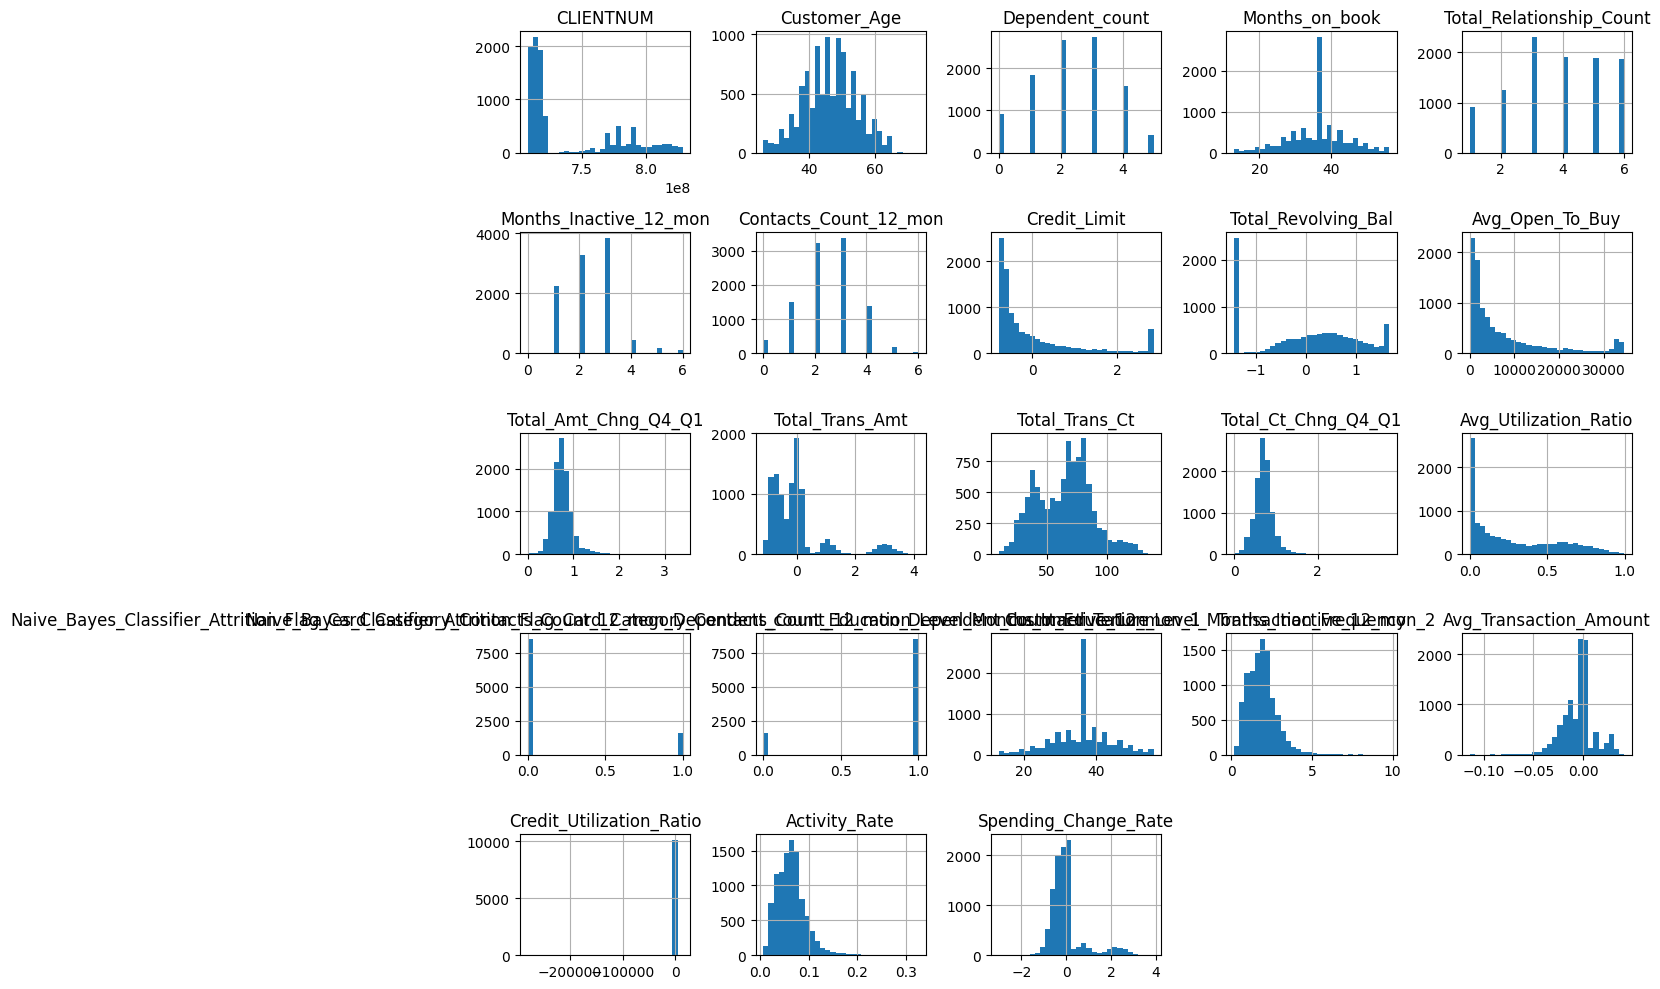

In [14]:
# Distribution of numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
df[numeric_cols].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

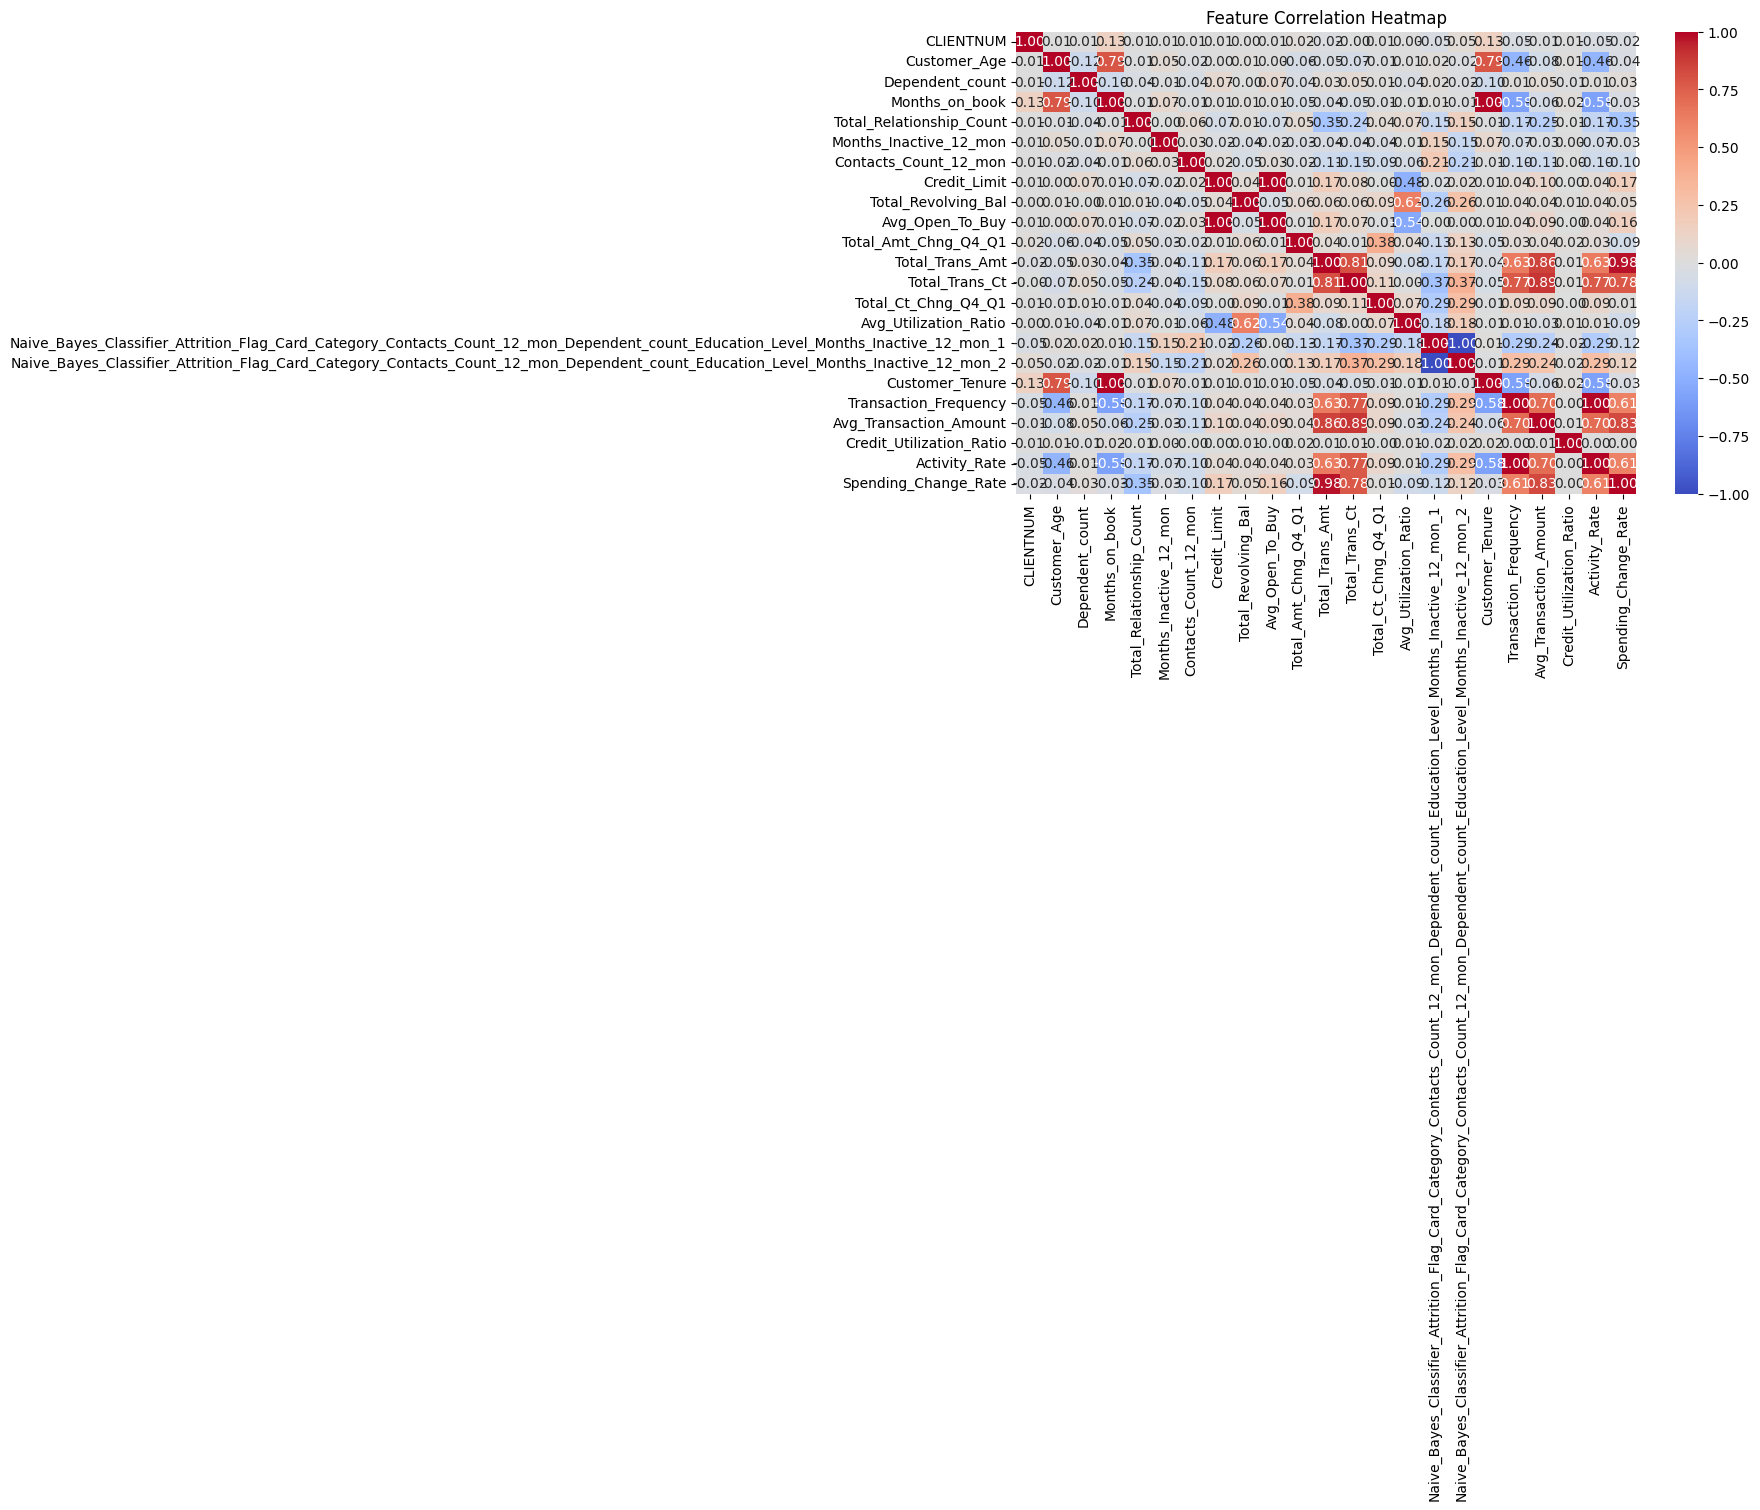

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

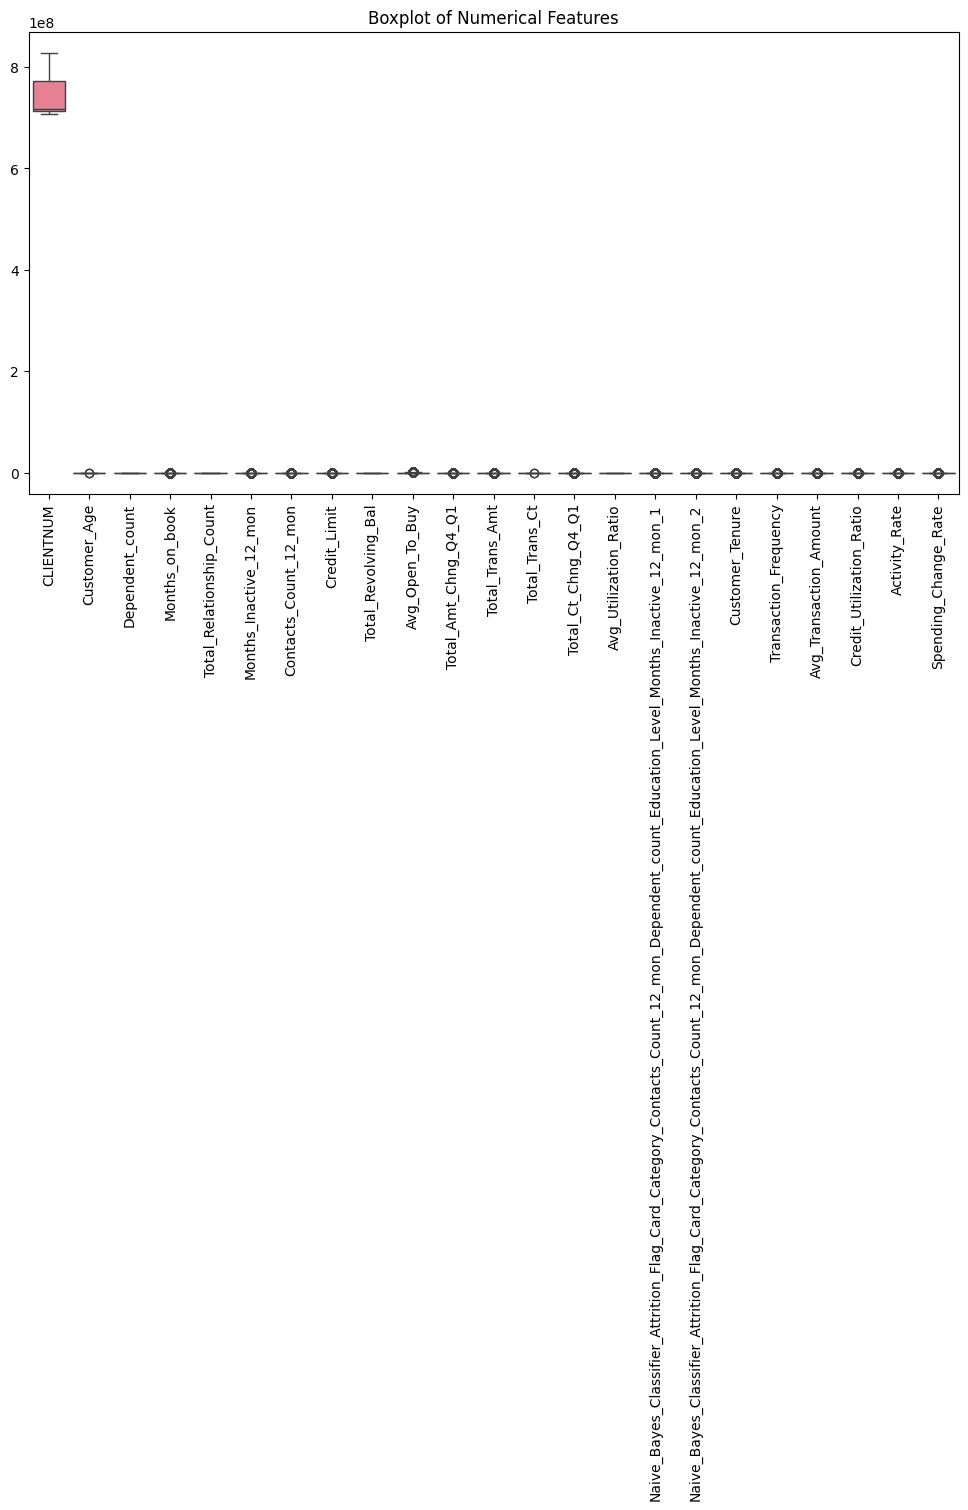

In [16]:
# Boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

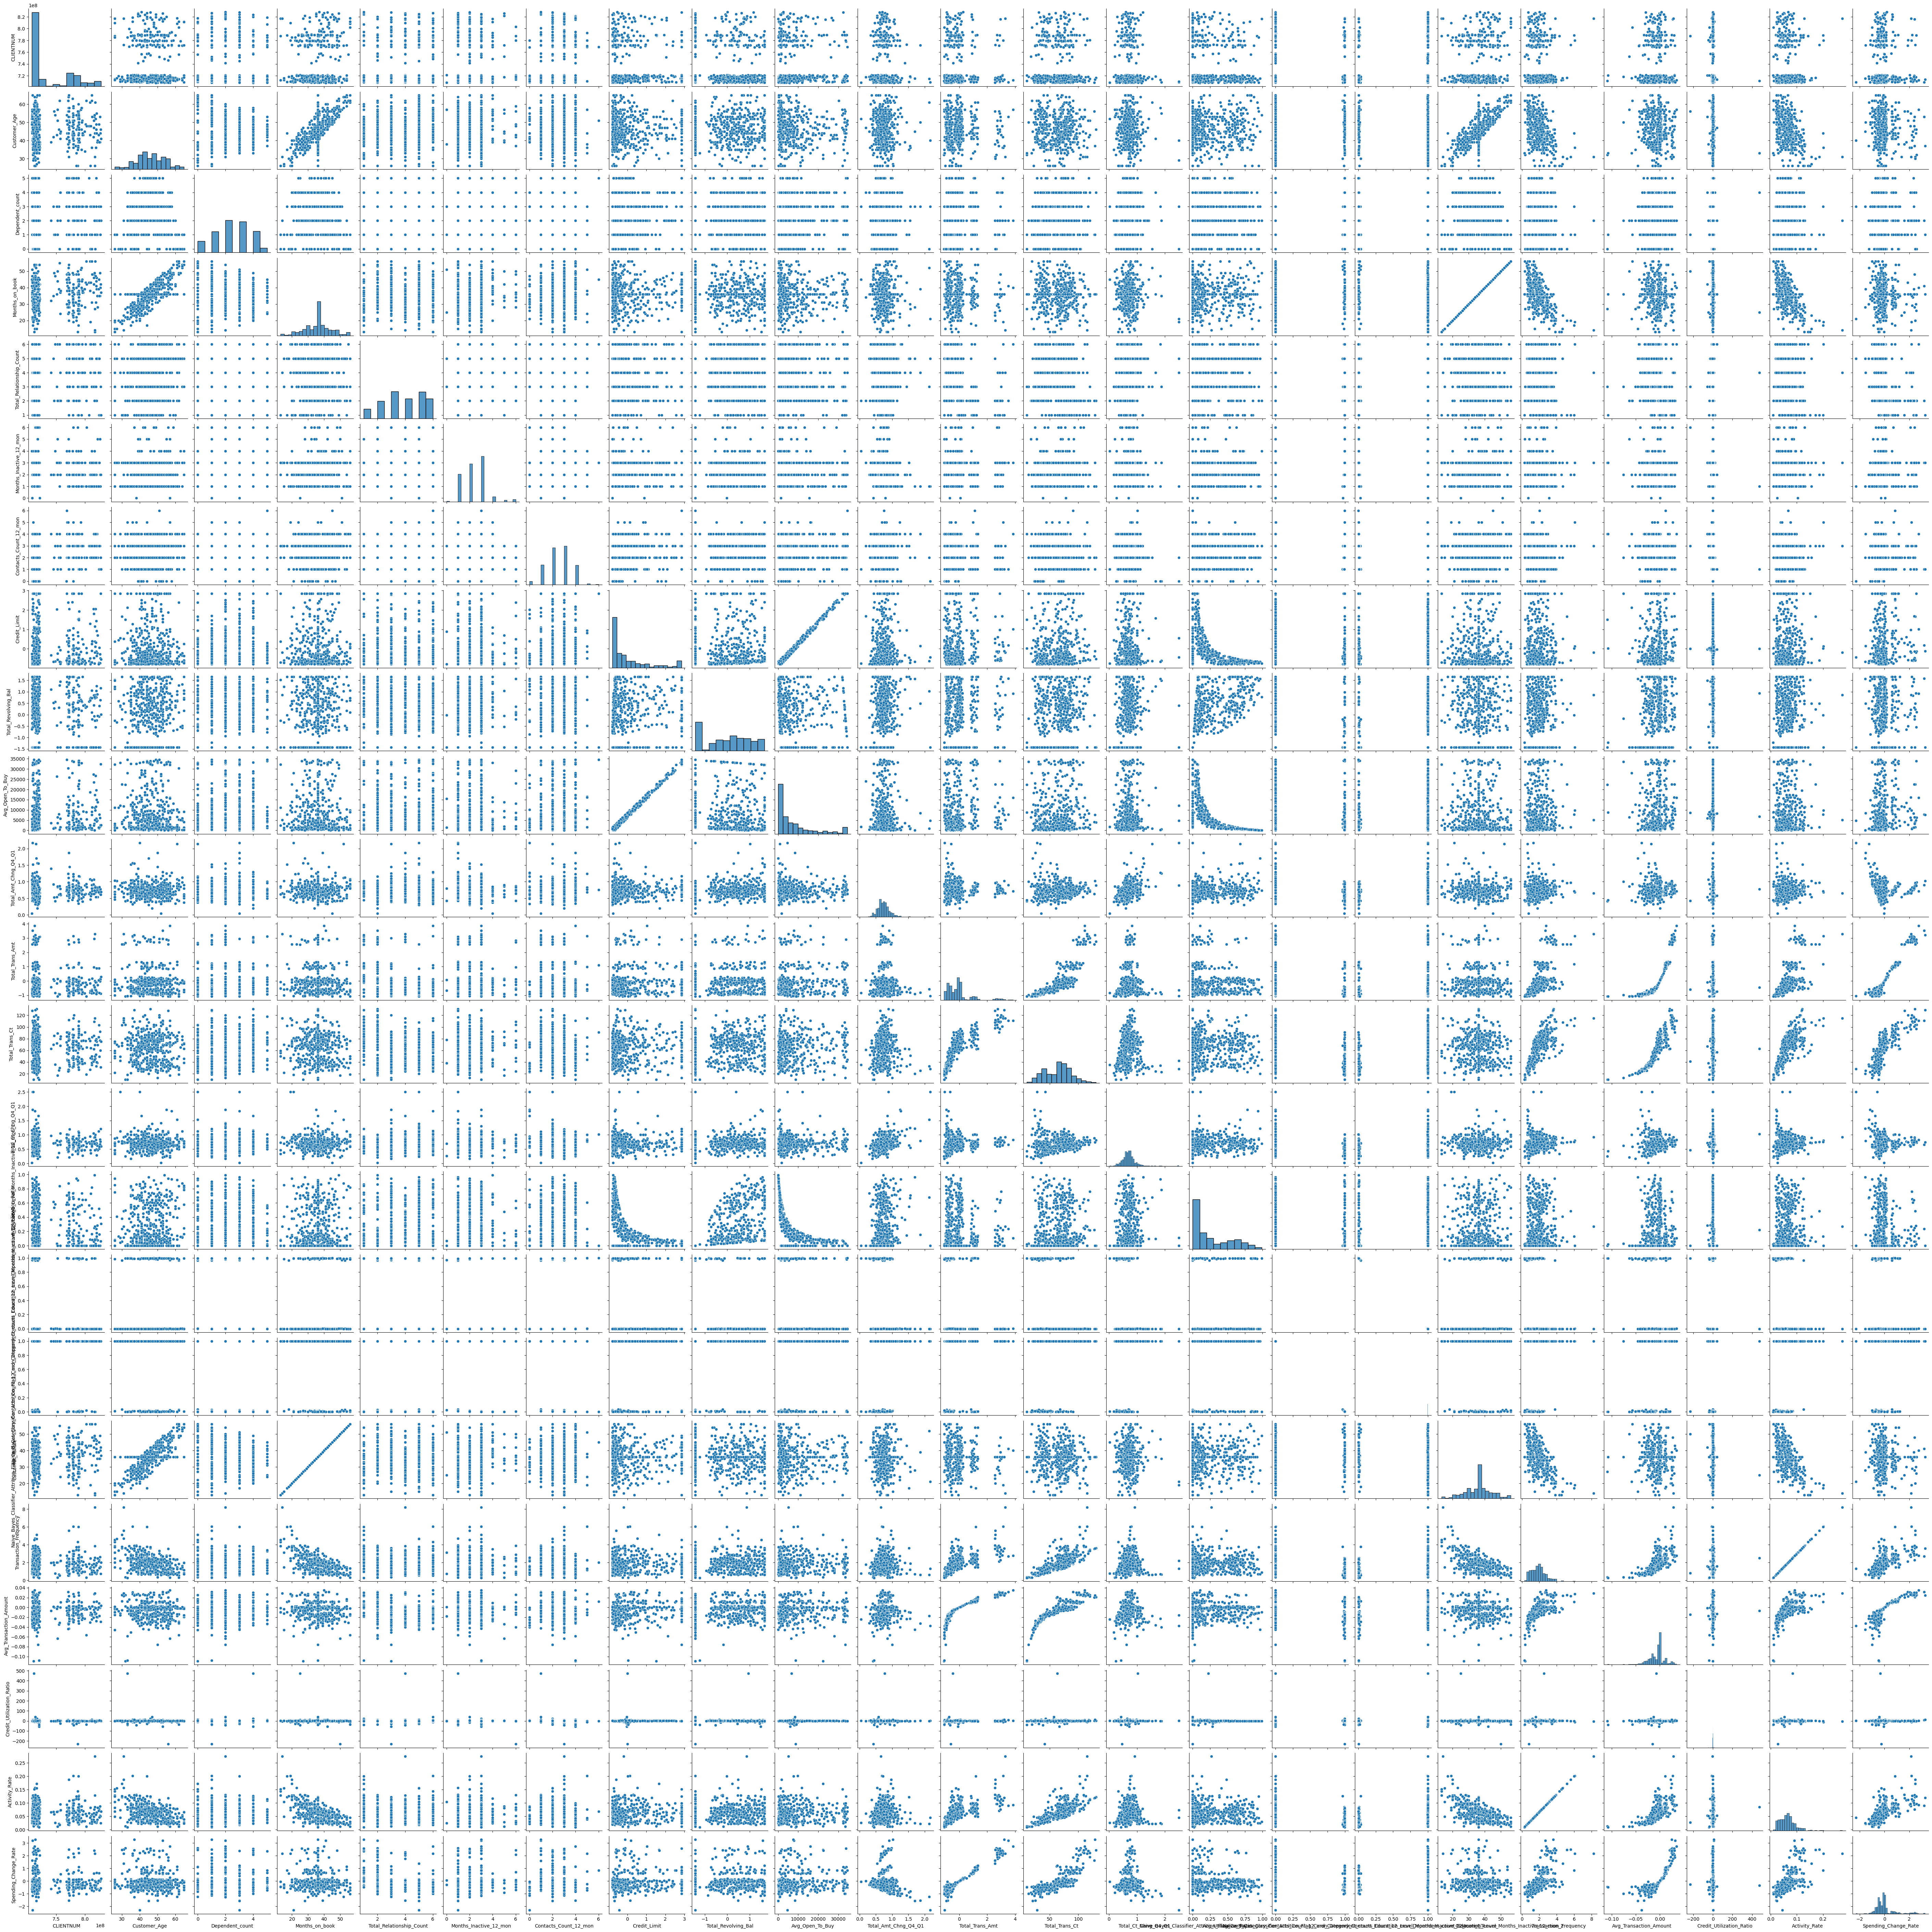

In [17]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action="ignore", category=FutureWarning)

    # Pairplot to check relationships (sample 500 rows for performance)
    sns.pairplot(df[numeric_cols].sample(500))
    plt.show()

In [18]:
# Save processed EDA data
file_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data/eda/eda_summary.csv"))
df.to_csv(file_path, index=False)

OSError: Cannot save file into a non-existent directory: '/home/vineeth/customer_churn_airflow/CustomerChurn/data/eda'